In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from scipy.special import logsumexp
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

# read data

In [2]:
X_df = np.array(pd.read_csv("./data/Q3/mixture1.geno", header = None))
Xnew_df = np.array(pd.read_csv("./data/Q3/mixture2.geno", header = None))
F_df = np.array(pd.read_csv("./data/Q3/mixture1.freq", header = None))
Z_df = np.array(pd.read_csv("./data/Q3/mixture1.ganc", header = None))

In [3]:
X_df

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]], dtype=int64)

In [4]:
Xnew_df

array([[1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
F_df

array([[0.775   , 0.008475],
       [0.6667  , 0.008333],
       [0.2583  , 0.5583  ],
       [0.25    , 0.3417  ],
       [0.1083  , 0.3417  ],
       [0.2288  , 0.05    ],
       [0.3333  , 0.5083  ],
       [0.475   , 0.4833  ],
       [0.3333  , 0.6167  ],
       [0.5833  , 0.3417  ],
       [0.3667  , 0.0431  ],
       [0.1833  , 0.2417  ],
       [0.0339  , 0.2167  ],
       [0.1583  , 0.9667  ],
       [0.425   , 0.5351  ],
       [0.1271  , 0.025   ],
       [0.325   , 0.7583  ],
       [0.5083  , 0.4083  ],
       [0.3333  , 0.09649 ],
       [0.2333  , 0.5085  ],
       [0.475   , 0.4917  ],
       [0.35    , 0.1356  ],
       [0.2667  , 0.725   ],
       [0.161   , 0.4667  ],
       [0.6667  , 0.2083  ],
       [0.2966  , 0.4917  ],
       [0.325   , 0.4     ],
       [0.575   , 0.4833  ],
       [0.125   , 0.125   ],
       [0.3333  , 0.008333],
       [0.325   , 0.4492  ],
       [0.06667 , 0.09322 ],
       [0.02542 , 0.161   ],
       [0.4417  , 0.5917  ],
       [0.0423

In [6]:
Z_df

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int64)

# implementation M

In [7]:
#X: N by M data matrix
#gamma: P(Z_i=k | X_i=x_i, theta) N by K = r_i_k
def M_step(X, gamma): 
    N, M = X.shape
    K = gamma.shape[1]
    
    ######### TODO 3a: modify the following to have meaning updates #########
    #pis = np.zeros((K,)) #Proportion vector pi: length K
    #F = np.zeros((M, K)) #Frequency matrix F: M by K
    
    temp = np.sum(gamma, axis=0) 
    pis = temp / N 

    zero_idx = np.where(temp < 1e-15)[0]
    temp[zero_idx] += np.inf
    temp_bc = np.tile(temp,(M,1)) # use auto broadcasting
    F = np.matmul(X.T,gamma) / (temp)
    
    ######### end of modification #########  

    return ({"pis": pis, "F": F})

In [8]:
params_1 = M_step(X_df,Z_df.astype(float))

In [9]:
params_1['pis']

array([0.394, 0.606])

In [10]:
params_1['F']

array([[0.79187817, 0.00660066],
       [0.63959391, 0.00825083],
       [0.24619289, 0.5379538 ],
       [0.27664975, 0.34488449],
       [0.08375635, 0.36963696],
       [0.22335025, 0.03630363],
       [0.33756345, 0.49339934],
       [0.49746193, 0.48514851],
       [0.37817259, 0.62706271],
       [0.59390863, 0.34983498],
       [0.35532995, 0.05610561],
       [0.1928934 , 0.21122112],
       [0.04822335, 0.2359736 ],
       [0.17258883, 0.97689769],
       [0.43147208, 0.53630363],
       [0.10152284, 0.02145215],
       [0.35532995, 0.74587459],
       [0.46700508, 0.3960396 ],
       [0.32994924, 0.11386139],
       [0.24873096, 0.52475248],
       [0.50507614, 0.4950495 ],
       [0.35279188, 0.15841584],
       [0.28680203, 0.72607261],
       [0.14467005, 0.47524752],
       [0.65736041, 0.23927393],
       [0.29695431, 0.48514851],
       [0.36040609, 0.36963696],
       [0.58883249, 0.47854785],
       [0.10152284, 0.11551155],
       [0.35532995, 0.00660066],
       [0.

In [11]:
F_df

array([[0.775   , 0.008475],
       [0.6667  , 0.008333],
       [0.2583  , 0.5583  ],
       [0.25    , 0.3417  ],
       [0.1083  , 0.3417  ],
       [0.2288  , 0.05    ],
       [0.3333  , 0.5083  ],
       [0.475   , 0.4833  ],
       [0.3333  , 0.6167  ],
       [0.5833  , 0.3417  ],
       [0.3667  , 0.0431  ],
       [0.1833  , 0.2417  ],
       [0.0339  , 0.2167  ],
       [0.1583  , 0.9667  ],
       [0.425   , 0.5351  ],
       [0.1271  , 0.025   ],
       [0.325   , 0.7583  ],
       [0.5083  , 0.4083  ],
       [0.3333  , 0.09649 ],
       [0.2333  , 0.5085  ],
       [0.475   , 0.4917  ],
       [0.35    , 0.1356  ],
       [0.2667  , 0.725   ],
       [0.161   , 0.4667  ],
       [0.6667  , 0.2083  ],
       [0.2966  , 0.4917  ],
       [0.325   , 0.4     ],
       [0.575   , 0.4833  ],
       [0.125   , 0.125   ],
       [0.3333  , 0.008333],
       [0.325   , 0.4492  ],
       [0.06667 , 0.09322 ],
       [0.02542 , 0.161   ],
       [0.4417  , 0.5917  ],
       [0.0423

In [12]:
print((params_1["F"] - F_df))

[[ 1.68781726e-02 -1.87433993e-03]
 [-2.71060914e-02 -8.21749175e-05]
 [-1.21071066e-02 -2.03462046e-02]
 [ 2.66497462e-02  3.18448845e-03]
 [-2.45436548e-02  2.79369637e-02]
 [-5.44974619e-03 -1.36963696e-02]
 [ 4.26345178e-03 -1.49006601e-02]
 [ 2.24619289e-02  1.84851485e-03]
 [ 4.48725888e-02  1.03627063e-02]
 [ 1.06086294e-02  8.13498350e-03]
 [-1.13700508e-02  1.30056106e-02]
 [ 9.59340102e-03 -3.04788779e-02]
 [ 1.43233503e-02  1.92735974e-02]
 [ 1.42888325e-02  1.01976898e-02]
 [ 6.47208122e-03  1.20363036e-03]
 [-2.55771574e-02 -3.54785479e-03]
 [ 3.03299492e-02 -1.24254125e-02]
 [-4.12949239e-02 -1.22603960e-02]
 [-3.35076142e-03  1.73713861e-02]
 [ 1.54309645e-02  1.62524752e-02]
 [ 3.00761421e-02  3.34950495e-03]
 [ 2.79187817e-03  2.28158416e-02]
 [ 2.01020305e-02  1.07260726e-03]
 [-1.63299492e-02  8.54752475e-03]
 [-9.33959391e-03  3.09739274e-02]
 [ 3.54314721e-04 -6.55148515e-03]
 [ 3.54060914e-02 -3.03630363e-02]
 [ 1.38324873e-02 -4.75214521e-03]
 [-2.34771574e-02 -9

# implementation E

In [13]:
#X: N by M data matrix
#params: a dictionary with two parameters returned from M_step
def E_step(X, params, thr = 10**(-8)):
    F = params["F"] #Frequency matrix F: M by K
    pis = params["pis"] #Proportion vector pi: length K
    
    N, M = X.shape
    K = F.shape[1] 
    ######### TODO 3b: modify the following to have meaning updates #########
    #calculate weighted_log_prob: log(P(X_i=x_i | Z_i=k, theta) * P(Z_i=k | theta))
    #calcualte log_prob_sample: log P(Xi=x_i | theta) length N vector. Hint: use logsumexp function
    #calcualte log_prob_data: log P(X_1:n=x_1:n | theta) scalar
    #calculate log_gammas: log P(Z_i=k | X_i=x_i, theta) N by K
    
    F = np.where(F < 1e-15, thr, F)
    F = np.where(F > 1-1e-15, 1-thr, F)

    weighted_log_prob = np.zeros((N,K))
    weighted_log_prob = np.matmul(X,np.log(F)) + np.matmul(1-X,np.log(1-F)) + np.log(pis)
    log_prob_sample = logsumexp(weighted_log_prob,axis = 1)
    log_prob_data = np.sum(log_prob_sample,axis = 0)
    log_gammas = weighted_log_prob - log_prob_sample.reshape(-1, 1) * np.ones((N, K))
    
    ######### end of modification #########
    return log_gammas, log_prob_data

In [14]:
params_2 = {}
params_2["F"] = F_df
params_2['pis'] = params_1['pis']

In [15]:
params_2

{'F': array([[0.775   , 0.008475],
        [0.6667  , 0.008333],
        [0.2583  , 0.5583  ],
        [0.25    , 0.3417  ],
        [0.1083  , 0.3417  ],
        [0.2288  , 0.05    ],
        [0.3333  , 0.5083  ],
        [0.475   , 0.4833  ],
        [0.3333  , 0.6167  ],
        [0.5833  , 0.3417  ],
        [0.3667  , 0.0431  ],
        [0.1833  , 0.2417  ],
        [0.0339  , 0.2167  ],
        [0.1583  , 0.9667  ],
        [0.425   , 0.5351  ],
        [0.1271  , 0.025   ],
        [0.325   , 0.7583  ],
        [0.5083  , 0.4083  ],
        [0.3333  , 0.09649 ],
        [0.2333  , 0.5085  ],
        [0.475   , 0.4917  ],
        [0.35    , 0.1356  ],
        [0.2667  , 0.725   ],
        [0.161   , 0.4667  ],
        [0.6667  , 0.2083  ],
        [0.2966  , 0.4917  ],
        [0.325   , 0.4     ],
        [0.575   , 0.4833  ],
        [0.125   , 0.125   ],
        [0.3333  , 0.008333],
        [0.325   , 0.4492  ],
        [0.06667 , 0.09322 ],
        [0.02542 , 0.161   ],
     

In [16]:
log_gammas, log_prob_data = E_step(X_df,params_2)

In [17]:
log_gammas

array([[-49.49979573,   0.        ],
       [-60.94183417,   0.        ],
       [-50.39638738,   0.        ],
       ...,
       [-67.25055118,   0.        ],
       [-48.91102706,   0.        ],
       [-51.13749732,   0.        ]])

In [18]:
X_df.shape

(1000, 250)

In [19]:
map_estimate_individuals = np.argmax(log_gammas, axis=1)

In [20]:
Z_est_df = np.zeros(Z_df.shape, dtype = 'int64')
for i in range(Z_est_df.shape[0]):
    Z_est_df[i,map_estimate_individuals[i]] = 1

In [21]:
np.sum(Z_est_df - Z_df) # all of them are correctly identified

0

In [22]:
cluster_no_truth = np.argmax(Z_df,axis = 1)

In [23]:
accuracy = adjusted_rand_score(cluster_no_truth,map_estimate_individuals)

In [24]:
print(accuracy)

1.0


# implementation EM 

In [25]:
def EM(X, K = 2, max_iter = 100, tol = 10**(-4), n_init = 3, debug = False):
    
    N, M = X.shape 
    res = {}
    
    
    best_log_prob_data = -np.inf
    converged  = False 
    
    params_pis_list = []
    params_F_list = []
    log_prob_data_last_list = []
    log_prob_data_inits_list = []
    gammas_list = []
    init_list = []
    converged_list =[]
    map_est_list = []
    params_list = []
    #loop through different random starting points
    for init in range(1, 1+n_init, 1):
        params = {}
        np.random.seed(init)
        if(debug):
            print(f"starting EM on random initialization: {init} out of {n_init}")
        
        ######### TODO 3c: modify the following to have the full EM updates #########
        
        #initialize soft assignment 
        gammas = np.random.uniform(0.01, 0.99, size=(N,K))
        gammas = gammas/np.sum(gammas,axis=1, keepdims=True)

        F = np.random.rand(M, K)
        F = F/np.sum(F,axis=1, keepdims=True)

        pis = np.random.rand(K)
        pis = pis/np.sum(pis,keepdims=True)
        
        params["pis"] = pis
        params["F"] = F
        
        log_prob_data  = -np.inf
        log_prob_data_list = []
        for n_iter in range(1, 1+max_iter, 1):
            prev_log_prob_data = log_prob_data
            log_gammas, log_prob_data = E_step(X, params)
            gammas = np.exp(log_gammas)
            params = M_step(X, gammas)
            
        
            ######### convergence check #########
            change = (log_prob_data - prev_log_prob_data)/N
            #print(change)
            log_prob_data_list.append(log_prob_data)
            if abs(change) < tol:
                if(debug):
                    print(f"random initialization {init} converged at iteration {n_iter}")
                    print("")
                converged = True
                break

        
        ######### update on the best initialization #########
        log_prob_data_inits_list.append(log_prob_data_list)
        params_list.append(params)
        params_pis_list.append(params["pis"])
        params_F_list.append(params["F"])
        log_prob_data_last_list.append(log_prob_data)
        gammas_list.append(gammas)     
        init_list.append(init)
        converged_list.append(converged)
        map_est_list.append(np.argmax(gammas,axis = 1))

    ######### end of modification #########
    best_init_idx = log_prob_data_last_list.index(max(log_prob_data_last_list))
    best_init = init_list[best_init_idx]
    
    res["converged"] = converged_list        
    res["best_init"] = best_init
    res["params_pis"] = params_pis_list #yanlis
    res["params_F"] = params_F_list
    res["inits"] = init_list
    res["log_prob_data_opt"] = log_prob_data_last_list
    res["gammas"] = gammas_list
    res["history_log_prob_data"] = log_prob_data_inits_list
    res["inferred_ancestry_label"] = map_est_list
    return(res)

In [26]:
X_small_df = X_df[:,:10]
res_small = EM(X_small_df)

In [27]:
res_small

{'converged': [True, True, True],
 'best_init': 3,
 'params_pis': [array([0.4043633, 0.5956367]),
  array([0.59593667, 0.40406333]),
  array([0.41097026, 0.58902974])],
 'params_F': [array([[0.76853158, 0.0087873 ],
         [0.62503802, 0.00714792],
         [0.24691472, 0.54254002],
         [0.27372431, 0.34805769],
         [0.0776816 , 0.37873491],
         [0.22806735, 0.02984694],
         [0.33331025, 0.49899808],
         [0.4876292 , 0.49160948],
         [0.37960279, 0.63042214],
         [0.60190767, 0.34015806]]),
  array([[0.00870252, 0.76922063],
         [0.00745558, 0.62504298],
         [0.54242949, 0.24685827],
         [0.34800972, 0.27373988],
         [0.37863879, 0.07759987],
         [0.02988326, 0.22816094],
         [0.49894   , 0.33327289],
         [0.49159459, 0.48764821],
         [0.63035622, 0.37951381],
         [0.34025461, 0.60195961]]),
  array([[0.75952895, 0.00654668],
         [0.61989536, 0.00380532],
         [0.24843775, 0.54479333],
         [

In [28]:
res_small["history_log_prob_data"][0]

[-7294.347014235721,
 -6150.169961004568,
 -6055.62891498229,
 -5942.91703614387,
 -5863.686618376203,
 -5834.221721305272,
 -5826.382474486336,
 -5824.202705767968,
 -5823.375280765224,
 -5822.93603693218,
 -5822.651187424204,
 -5822.449292278184,
 -5822.300446267645,
 -5822.188315928712,
 -5822.102540421602]

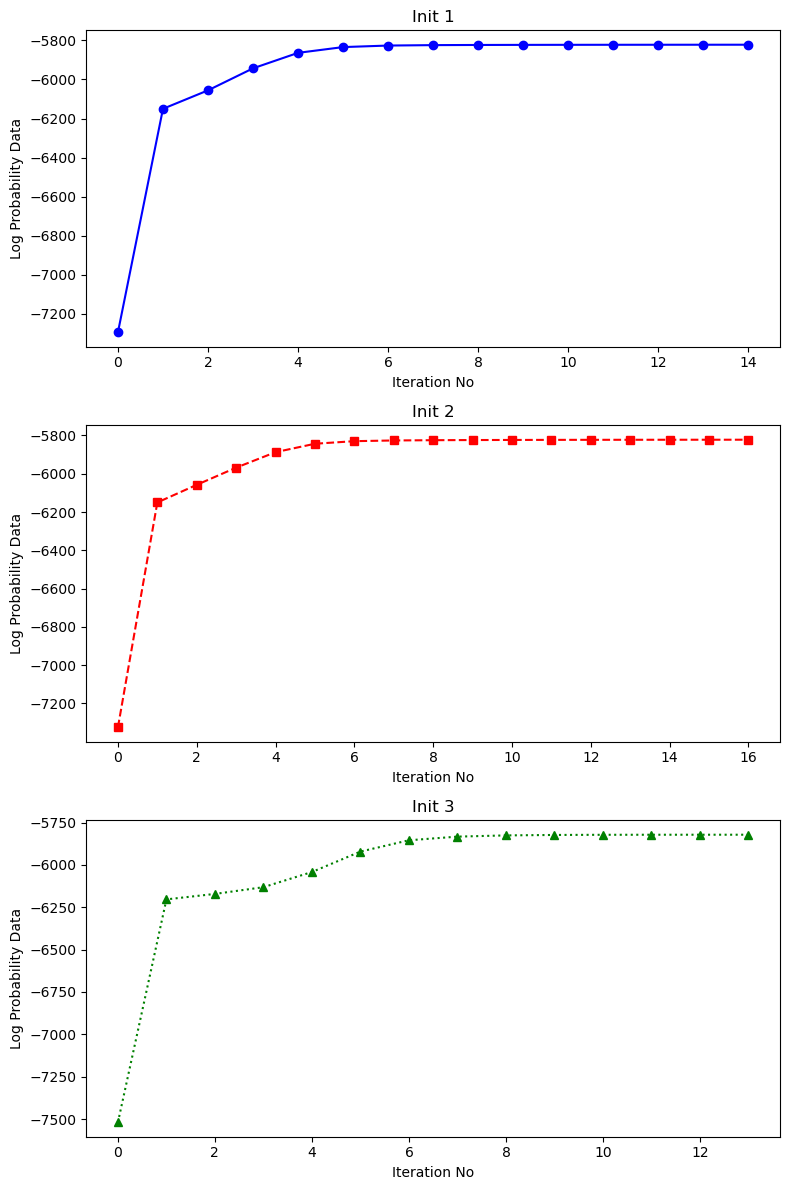

In [29]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plotting for list1
axs[0].plot(range(len(res_small["history_log_prob_data"][0])), res_small["history_log_prob_data"][0], marker='o', linestyle='-', color='b')
axs[0].set_title('Init 1')
axs[0].set_xlabel('Iteration No')
axs[0].set_ylabel('Log Probability Data')

# Plotting for list2
axs[1].plot(range(len(res_small["history_log_prob_data"][1])), res_small["history_log_prob_data"][1], marker='s', linestyle='--', color='r')
axs[1].set_title('Init 2')
axs[1].set_xlabel('Iteration No')
axs[1].set_ylabel('Log Probability Data')

# Plotting for list3
axs[2].plot(range(len(res_small["history_log_prob_data"][2])), res_small["history_log_prob_data"][2], marker='^', linestyle=':', color='g')
axs[2].set_title('Init 3')
axs[2].set_xlabel('Iteration No')
axs[2].set_ylabel('Log Probability Data')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [30]:
res_small = EM(X_small_df, K = 3)

In [31]:
res_small.keys()

dict_keys(['converged', 'best_init', 'params_pis', 'params_F', 'inits', 'log_prob_data_opt', 'gammas', 'history_log_prob_data', 'inferred_ancestry_label'])

In [32]:
res_small["log_prob_data_opt"]

[-5819.384247780635, -5813.984426089208, -5813.458229577478]

In [33]:
res_small["inferred_ancestry_label"]

[array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 

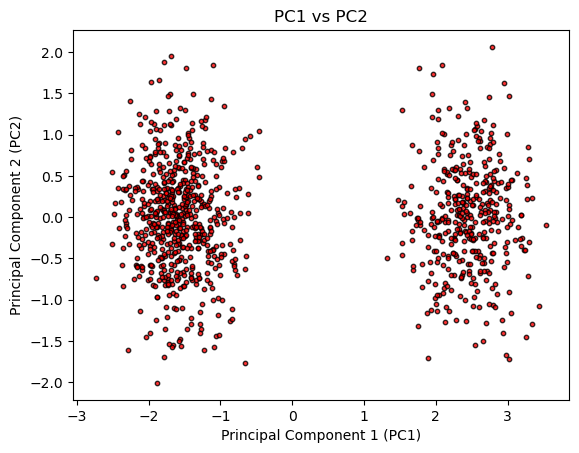

In [34]:
pca = PCA(n_components=2)
PCs = pca.fit_transform(X_df)

pc1 = PCs[:, 0]
pc2 = PCs[:, 1]

# Plot PC1 vs PC2
plt.scatter(pc1, pc2,c='red', marker='o', edgecolors='black', alpha=0.8,s = 10)

# Add labels and legend
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PC1 vs PC2')

# Display the plot
plt.show()

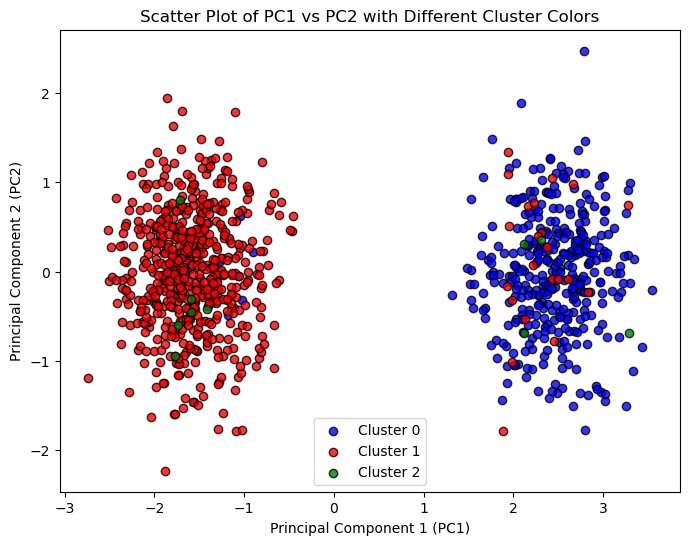

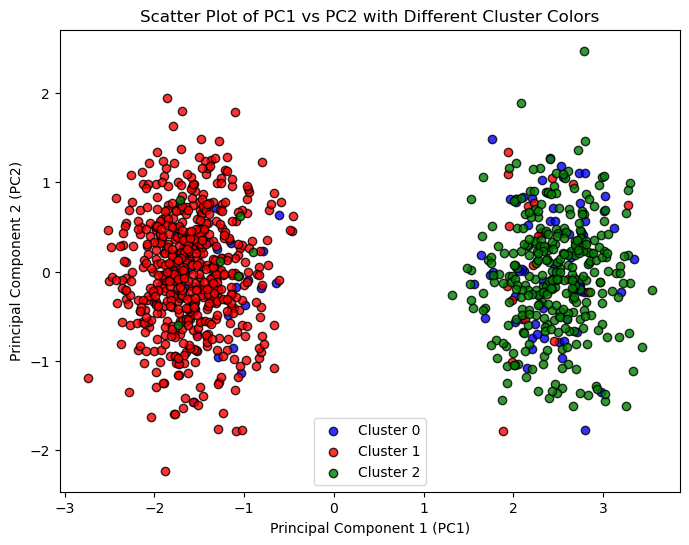

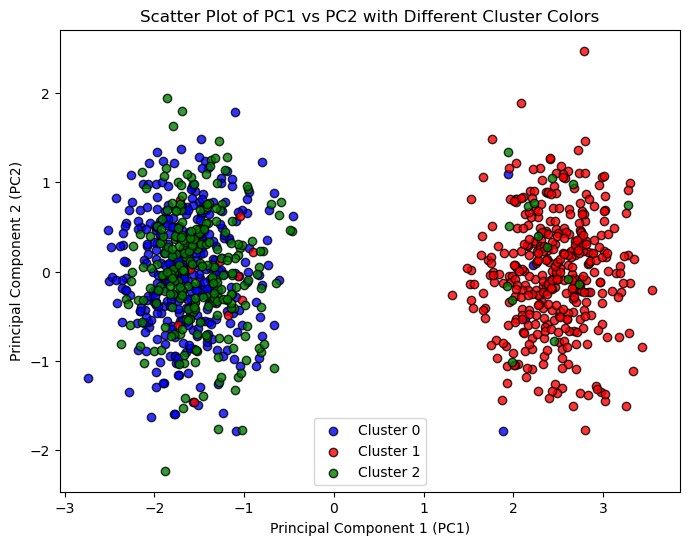

In [35]:
pca = PCA(n_components=2)
PCs = pca.fit_transform(X_df)

pc1 = PCs[:, 0]
pc2 = PCs[:, 1]

# Define unique colors for each cluster
cluster_colors = {0: 'blue', 1: 'red',2:'green'}
clusters = res_small["inferred_ancestry_label"][0]
# Plot PC1 vs PC2 with different colors for each cluster
plt.figure(figsize=(8, 6))
for cluster in np.unique(clusters):
    cluster_indices = np.where(clusters == cluster)
    plt.scatter(pc1[cluster_indices], pc2[cluster_indices], label=f'Cluster {cluster}', color=cluster_colors[cluster], edgecolors='black', alpha=0.8)

# Add labels and legend
plt.title('Scatter Plot of PC1 vs PC2 with Different Cluster Colors')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()

# Define unique colors for each cluster
cluster_colors = {0: 'blue', 1: 'red',2:'green'}
clusters = res_small["inferred_ancestry_label"][1]
# Plot PC1 vs PC2 with different colors for each cluster
plt.figure(figsize=(8, 6))
for cluster in np.unique(clusters):
    cluster_indices = np.where(clusters == cluster)
    plt.scatter(pc1[cluster_indices], pc2[cluster_indices], label=f'Cluster {cluster}', color=cluster_colors[cluster], edgecolors='black', alpha=0.8)

# Add labels and legend
plt.title('Scatter Plot of PC1 vs PC2 with Different Cluster Colors')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()

# Define unique colors for each cluster
cluster_colors = {0: 'blue', 1: 'red',2:'green'}
clusters = res_small["inferred_ancestry_label"][2]
# Plot PC1 vs PC2 with different colors for each cluster
plt.figure(figsize=(8, 6))
for cluster in np.unique(clusters):
    cluster_indices = np.where(clusters == cluster)
    plt.scatter(pc1[cluster_indices], pc2[cluster_indices], label=f'Cluster {cluster}', color=cluster_colors[cluster], edgecolors='black', alpha=0.8)

# Add labels and legend
plt.title('Scatter Plot of PC1 vs PC2 with Different Cluster Colors')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

In [36]:
res_list = []
scores = []
n_snps = [10,25,50,100,150,200,250]
cluster_no_truth = np.argmax(Z_df,axis = 1)
for i in range(len(n_snps)):
    X_sliced = X_df[:,:n_snps[i]]
    res_sliced = EM(X_sliced, K = 2)
    res_list.append(res_sliced)
    
    best_init_idx = res_sliced["inits"].index(res_sliced["best_init"])
    inferred_label = res_sliced["inferred_ancestry_label"][best_init_idx]
    
    score = adjusted_rand_score(cluster_no_truth,inferred_label)
    scores.append(score)

In [37]:
scores

[0.8644550089693742,
 0.9446215746273722,
 0.9760720170761824,
 0.995992394446082,
 1.0,
 1.0,
 1.0]

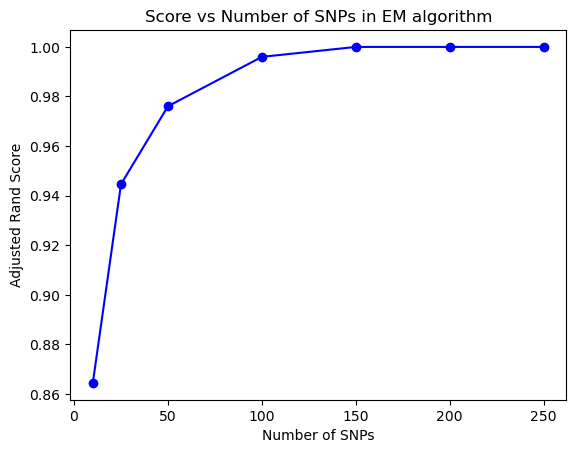

In [38]:
# Create a line plot
plt.plot(n_snps, scores, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Number of SNPs')
plt.ylabel('Adjusted Rand Score')
plt.title('Score vs Number of SNPs in EM algorithm')

# Display the plot
plt.show()

In [39]:
#Dataset 2
res_list = []
log_likelihood_opts = []
K_list = [1,2,3,4,5]
for i in range(len(K_list)):
    X_sliced = Xnew_df[:,:100]
    res_sliced = EM(X_sliced, K = K_list[i],n_init = 3)
    best_init_idx = res_sliced["inits"].index(res_sliced["best_init"])
    log_likelihood_opt = res_sliced["log_prob_data_opt"][best_init_idx]
    log_likelihood_opts.append(log_likelihood_opt)

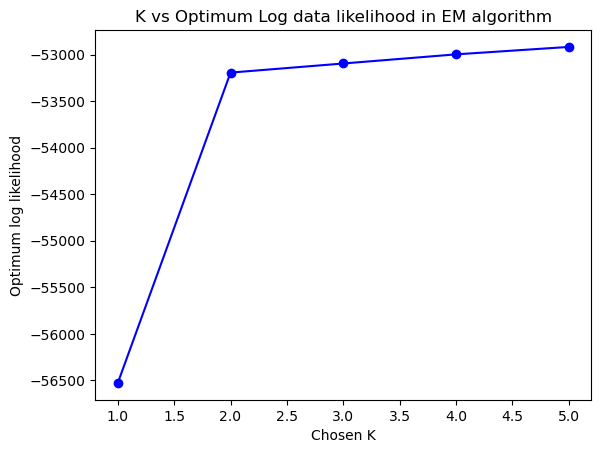

In [40]:
# Create a line plot
plt.plot(K_list, log_likelihood_opts, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Chosen K')
plt.ylabel('Optimum log likelihood')
plt.title('K vs Optimum Log data likelihood in EM algorithm')

# Display the plot
plt.show()

In [41]:
print(K_list[log_likelihood_opts.index(max(log_likelihood_opts))])

5


In [42]:
res_h_part = EM(Xnew_df, K = 2)

In [43]:
res_h_part

{'converged': [True, True, True],
 'best_init': 3,
 'params_pis': [array([0.776, 0.224]),
  array([0.224, 0.776]),
  array([0.776, 0.224])],
 'params_F': [array([[7.84793814e-01, 1.33928571e-02],
         [6.76546392e-01, 3.59915045e-19],
         [2.31958763e-01, 5.58035714e-01],
         [2.48711340e-01, 3.61607143e-01],
         [1.14690722e-01, 3.66071429e-01],
         [2.30670103e-01, 4.46428571e-02],
         [3.45360825e-01, 4.59821429e-01],
         [4.45876289e-01, 4.06250000e-01],
         [3.44072165e-01, 6.25000000e-01],
         [5.82474227e-01, 2.76785714e-01],
         [3.82731959e-01, 4.01785714e-02],
         [1.86855670e-01, 2.23214286e-01],
         [3.22164948e-02, 2.27678571e-01],
         [1.70103093e-01, 9.68750000e-01],
         [4.26546392e-01, 5.22321429e-01],
         [1.25000000e-01, 1.33928571e-02],
         [3.10567010e-01, 8.12500000e-01],
         [4.97422680e-01, 3.43750000e-01],
         [3.13144330e-01, 7.14285714e-02],
         [2.20360825e-01, 5.17

In [44]:
best_init_idx = res_h_part["inits"].index(res_h_part["best_init"])
print(res_h_part["params_pis"][best_init_idx])

[0.776 0.224]


In [45]:
res_h_part

{'converged': [True, True, True],
 'best_init': 3,
 'params_pis': [array([0.776, 0.224]),
  array([0.224, 0.776]),
  array([0.776, 0.224])],
 'params_F': [array([[7.84793814e-01, 1.33928571e-02],
         [6.76546392e-01, 3.59915045e-19],
         [2.31958763e-01, 5.58035714e-01],
         [2.48711340e-01, 3.61607143e-01],
         [1.14690722e-01, 3.66071429e-01],
         [2.30670103e-01, 4.46428571e-02],
         [3.45360825e-01, 4.59821429e-01],
         [4.45876289e-01, 4.06250000e-01],
         [3.44072165e-01, 6.25000000e-01],
         [5.82474227e-01, 2.76785714e-01],
         [3.82731959e-01, 4.01785714e-02],
         [1.86855670e-01, 2.23214286e-01],
         [3.22164948e-02, 2.27678571e-01],
         [1.70103093e-01, 9.68750000e-01],
         [4.26546392e-01, 5.22321429e-01],
         [1.25000000e-01, 1.33928571e-02],
         [3.10567010e-01, 8.12500000e-01],
         [4.97422680e-01, 3.43750000e-01],
         [3.13144330e-01, 7.14285714e-02],
         [2.20360825e-01, 5.17

In [46]:
#Dataset 2
res_list = []
log_likelihood_opts = []
K_list = [1,2,3,4,5]
for i in range(len(K_list)):
    X_sliced = Xnew_df[:,:100]
    res_sliced = EM(X_sliced, K = K_list[i],n_init = 100)
    res_list.append(res_sliced)
    best_init_idx = res_sliced["inits"].index(res_sliced["best_init"])
    log_likelihood_opt = res_sliced["log_prob_data_opt"][best_init_idx]
    log_likelihood_opts.append(log_likelihood_opt)

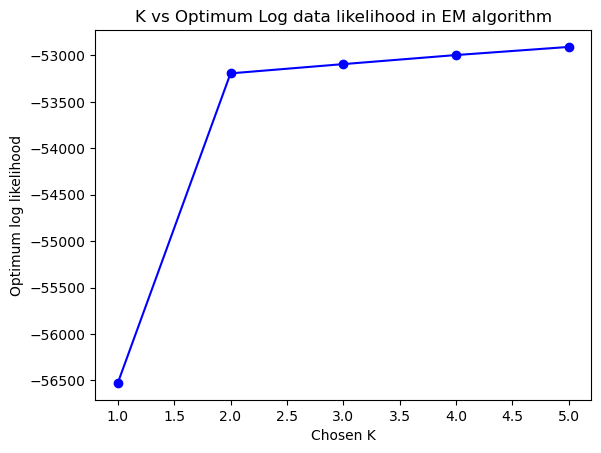

In [47]:
# Create a line plot
plt.plot(K_list, log_likelihood_opts, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Chosen K')
plt.ylabel('Optimum log likelihood')
plt.title('K vs Optimum Log data likelihood in EM algorithm')

# Display the plot
plt.show()